In [ ]:
#started at 10:30

# 1. Загрузить файл hr.csv

In [1]:
import pandas as pd

In [2]:
! ls

 HR.csv   project.pdf  'Python Project work.ipynb'


In [111]:
hr=pd.read_csv("HR.csv")
#hr.rename(columns={'promotion_last_5years':'promotions'})
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [55]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [175]:
hr.agg({'mean', 'std', 'min', 'max', 'median'})
#hr.describe()
#среднее, мин, макс, сред. отклонение

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
median,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,technical,medium
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,IT,high
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN


In [14]:
# мода
hr.mode().head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low


In [ ]:
#continued at 11:00
#paused at 11:30
#continued at 12:55

# 3. Рассчитать и визуализировать корреляционную матрицу для переменных

In [16]:
import numpy as np
import scipy
from scipy import stats

In [208]:
corr=hr.corr()

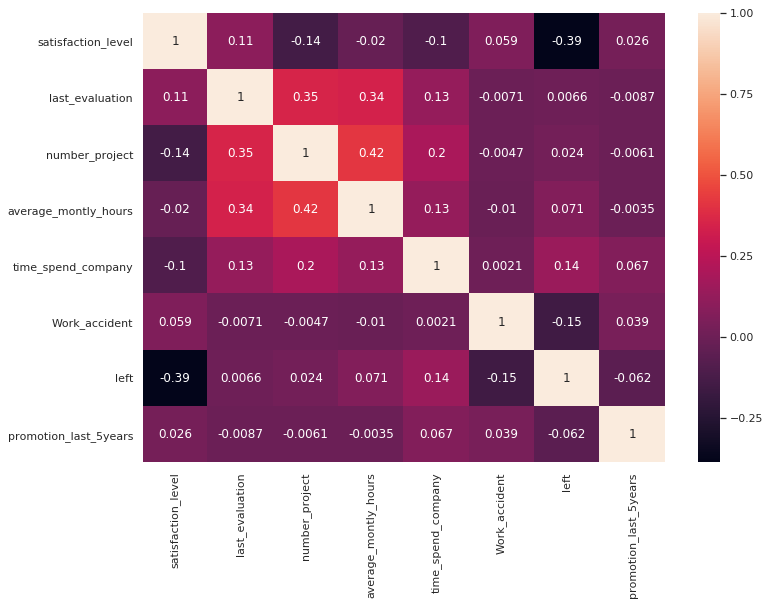

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(11.7, 8.27) )        # Sample figsize in inches

sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# 4. Визуализировать несколько взаимосвязей между переменными

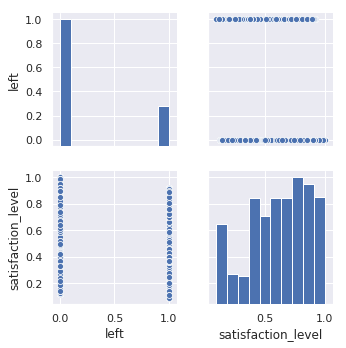

In [155]:

sns.pairplot(hr, vars=['left', 'satisfaction_level'],
                 kind='scatter')
#'left', 'satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary'

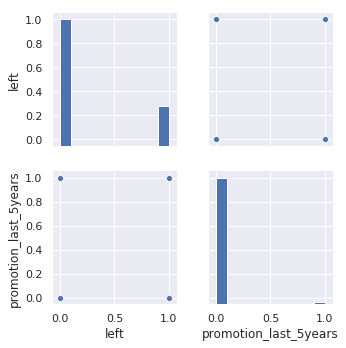

In [158]:

sns.pairplot(hr, vars=['left', 'promotion_last_5years'],
                 kind='scatter')


In [ ]:
#для наглядности нужно точки сделать толстыми в зависимости от количества данных туда попавших

In [105]:
#from pandas import pivot_table 
#table = pivot_table(hr, values='sales', index=['promotion_last_5years'], columns=['left'], aggfunc='count')
#table=hr.groupby(['promotion_last_5years', 'left']).agg('count')
table=hr.groupby(['promotion_last_5years', 'left'])['sales'].count().reset_index(name='count')
#table=hr.groupby(['promotion_last_5years', 'left'])['sales'].agg({"cou": {"sales": 'count'}}).reset_index()
table.head(5)
#table['cou'].head(5)

,promotion_last_5years,left,count
0,0,0,11128
1,0,1,3552
2,1,0,300
3,1,1,19


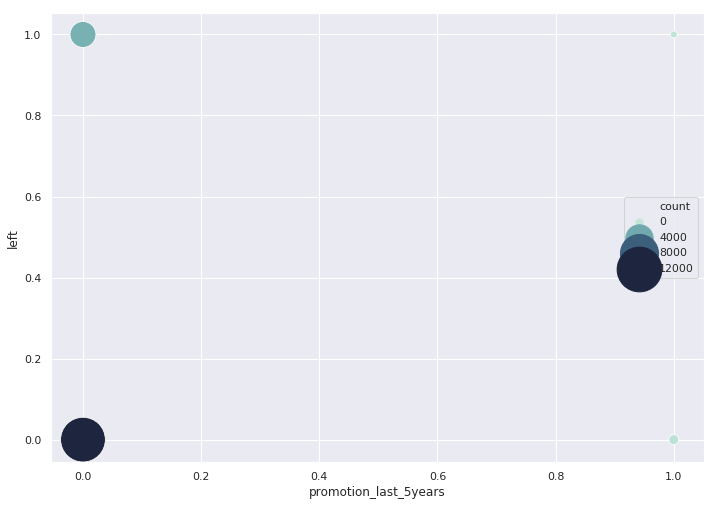

In [152]:
sns.set()

fig, ax = plt.subplots(figsize=(11.7, 8.27) )

cmap = sns.cubehelix_palette(rot=-0.3, as_cmap=True)
ax = sns.scatterplot(x="promotion_last_5years", y="left",
                     hue="count", 
                     size="count",
                     palette=cmap, sizes=(50, 2000),
                     data=table)

In [ ]:
#верхние две точки - ушедшие сотрудники. Большинство из них не получили повышения

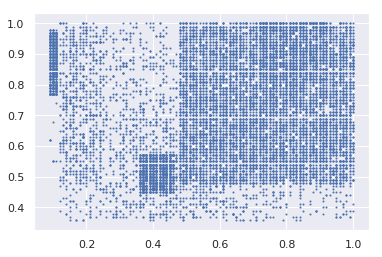

In [143]:
#x=hr['satisfaction_level']
#y=table['last_evaluation']
plt.scatter(hr['satisfaction_level'], hr['last_evaluation'], s=1)
#plt.plot(hr.left)
#plt.plot(x1, y1, 'bo', x1, y2, 'k', x1, y3, 'r--')

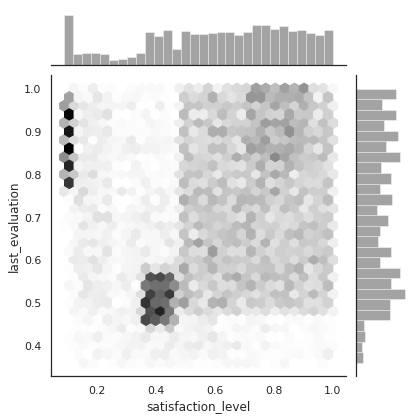

In [142]:
x=hr['satisfaction_level'] 
y = hr['last_evaluation']
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

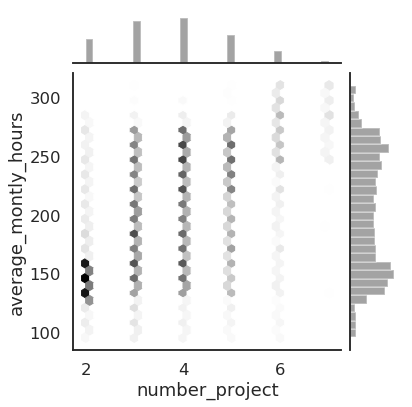

In [219]:
#sns.pairplot(hr, vars=['average_montly_hours', 'number_project'],
#                 kind='scatter')

x=hr['number_project'] 
y = hr['average_montly_hours']
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

# 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными

In [221]:
x=hr['number_project'] 
x_std =hr['number_project'].std()
y = hr['average_montly_hours']
y_std=hr['average_montly_hours'].std()
#print(x_std, y_std)
r_x_y=stats.pearsonr(x, y)[0] # линейный коэффициент регрессии
#print(r_x_y)
a_i=r_x_y*y_std/x_std
#print(a_i)   #16.90485267
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(slope, intercept, r_value, p_value, std_err)

16.90485267313102 136.7602769397467 0.41721063440177614 0.0 0.3006954351872095


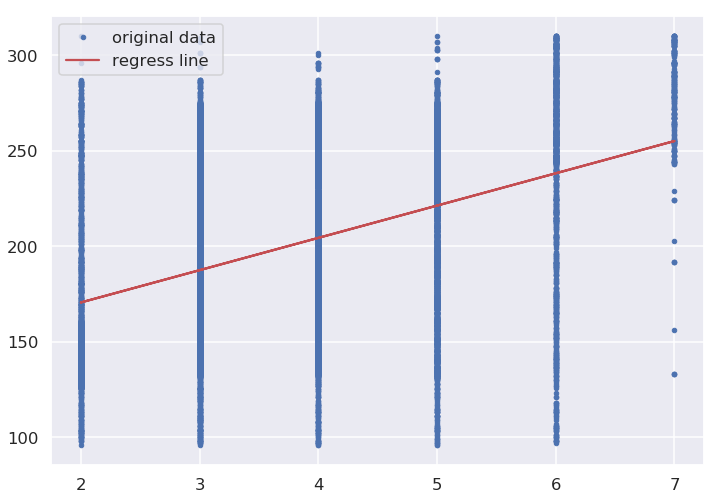

In [240]:
fig, ax = plt.subplots(figsize=(11.7, 8.27) )
plt.plot(x, y, 
        #'o',
         #"1",
         ".",
         #s=1,
         #'bo', x1, y2, 'k', x1, y3, 'r--'
         label='original data')
plt.plot(x, intercept + slope*x, 'r', label='regress line')
plt.legend()
plt.show()

In [242]:
hours_vs_projects=hr.groupby(['number_project'])['average_montly_hours'].mean().reset_index(name='mean')
hours_vs_projects

,number_project,mean
0,2,160.342546
1,3,197.507522
2,4,205.122108
3,5,212.061572
4,6,238.694208
5,7,276.078125


In [252]:
#Нулевая гипотеза: 
#Средние значения количества часов у занятых с 3 и менее кол-ва проектов и более загруженных сотрудников одинаковые
# Т.е. среднее количество часов в неделю не зависит от количества проектов. 
x=hr[hr['number_project']<4]['average_montly_hours']
y=hr[hr['number_project']>3]['average_montly_hours']
#print(len(x), len(y), np.mean(x), np.mean(y), np.std(x), np.std(y))
stats.ttest_ind(x, y)

Ttest_indResult(statistic=-38.64053101346626, pvalue=0.0)

In [ ]:
#Отвергаем нулевую гипотезу: средние количества часов в неделю не равны 

In [254]:
#Нулевая гипотеза: 
#Средние значения стажа в компании у попавших в аварию и везучих сотрудников одинаковые
# Т.е. среднее количество часов в неделю не зависит от количества проектов. 
x=hr[hr['Work_accident']==0]['time_spend_company']
y=hr[hr['Work_accident']==1]['time_spend_company']
print(len(x), len(y), np.mean(x), np.mean(y), np.std(x), np.std(y))
stats.ttest_ind(x, y)

12830 2169 3.4969602494154324 3.5057630244352236 1.424684440856797 1.654057135629661


Ttest_indResult(statistic=-0.2596717316698011, pvalue=0.7951205641281486)

In [ ]:
#принимаем гипотезу, что стаж в этих группах статистически неразличим с вероятностью 79,5%

# 6. Рассчитать сколько работников работает в каждом департаменте

In [131]:
dept=hr[hr['left']==0].groupby(['sales'])['left'].count().\
    reset_index(name='count').sort_values(by=['count'], ascending=False)
dept

,sales,count
7,sales,3126
9,technical,2023
8,support,1674
0,IT,954
6,product_mng,704
1,RandD,666
5,marketing,655
2,accounting,563
4,management,539
3,hr,524


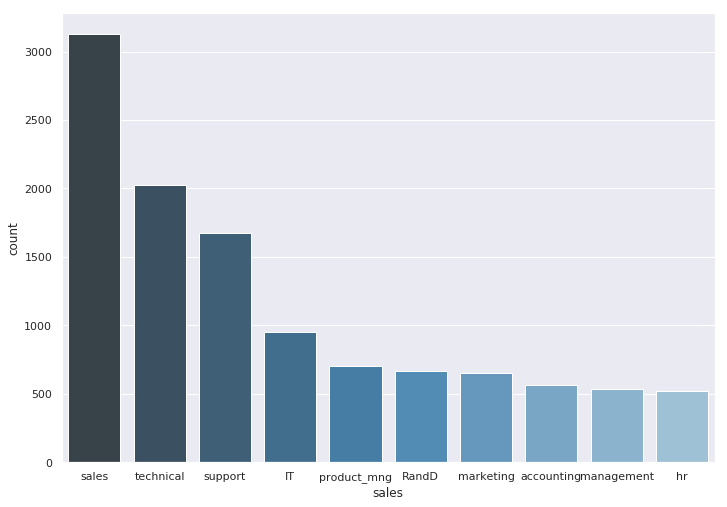

In [164]:
fig, ax = plt.subplots(figsize=(11.7, 8.27) )
ax = sns.barplot("sales", y="count", data=dept, palette="Blues_d")

# 7. Показать распределение сотрудников по зарплатам

In [133]:
salaries=hr[hr['left']==0].groupby(['salary'])['left'].count().\
    reset_index(name='count').sort_values(by=['count'], ascending=False)
salaries

,salary,count
1,low,5144
2,medium,5129
0,high,1155


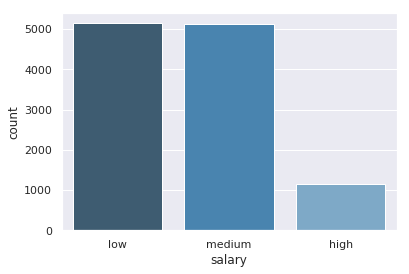

In [166]:
#fig, ax = plt.subplots(figsize=(11.7, 8.27) )
ax = sns.barplot("salary", y="count", data=salaries, palette="Blues_d")

# 8. Показать распределение сотрудников по зарплатам совместно с департаментами

In [204]:
#from pandas import pivot_table 
dept_salaries = pivot_table(hr[hr['left']==0], values='left', 
                                index=['sales'], columns=['salary'], aggfunc='count'
                                #, margins=1
                               )#.sort_values(by=count, ascending=False)
#hr = hr.reindex(dept_salaries['count'].sort_values(by=2012, ascending=False).index)

dept_salaries#.sort_values(by=count, ascending=False)

salary,high,low,medium
sales,,,
IT,79,437,438
RandD,47,309,310
accounting,69,259,235
hr,39,243,242
management,224,121,194
marketing,71,276,308
product_mng,62,346,296
sales,255,1402,1469
support,133,757,784


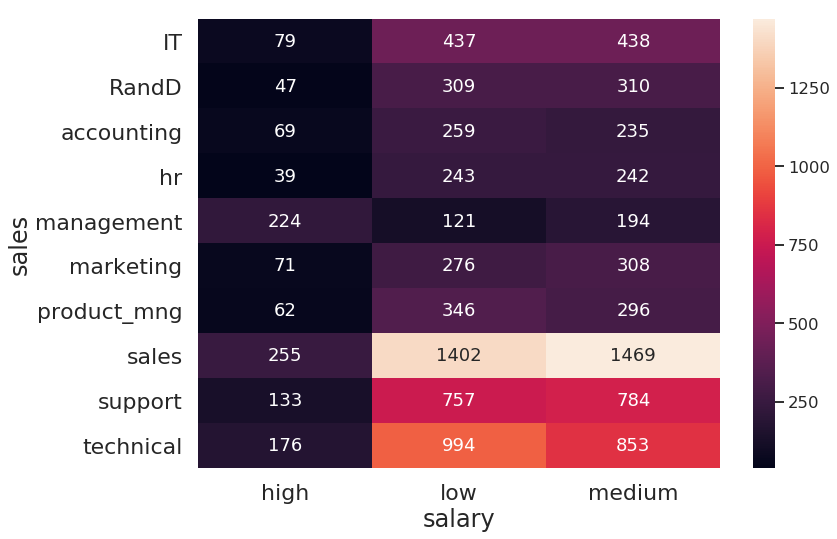

In [200]:
fig, ax = plt.subplots(figsize=(11.7, 8.27) )        # Sample figsize in inches

#sns.heatmap(dept_salaries, annot=True,
#            xticklabels=dept_salaries.columns.values,
#            yticklabels=dept_salaries.columns.values)
sns.set_context("talk")
sns.heatmap(dept_salaries, annot=True, fmt='g')

# 9. Сколько сотрудников покинули компанию

In [135]:
hr[hr['left']==1]['left'].count()

3571

# 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

In [257]:
#Нулевая гипотеза - доля уволившихся одинаковая у получивших и не получивших повышение
x=hr[hr['promotion_last_5years']==0]['left']
y=hr[hr['promotion_last_5years']==1]['left']
print(len(x), len(y), np.mean(x), np.mean(y), np.std(x), np.std(y))
stats.ttest_ind(x, y)
#'left', 'satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary'

14680 319 0.24196185286103541 0.05956112852664577 0.4282713095936877 0.23667192587055572


Ttest_indResult(statistic=7.581195349367636, pvalue=3.6240472241469694e-14)

In [ ]:
#отвергаем гипотезу, что доля уволившихся статистически неразличимая у продвинувшихся по карьере и нет.

In [260]:
#Нулевая гипотеза - доля уволившихся одинаковая у сотрудников довольных работой и остальных
x=hr[hr['satisfaction_level']>=0.65]['left']
y=hr[hr['satisfaction_level']<0.65]['left']
print(len(x), len(y), np.mean(x), np.mean(y), np.std(x), np.std(y))
stats.ttest_ind(x, y)

7478 7521 0.1279753944905055 0.3475601648716926 0.334062408683619 0.47619543956875693


Ttest_indResult(statistic=-32.672809020066694, pvalue=2.9742813039176043e-226)

In [ ]:
#отвергаем гипотезу, что доля уволившихся статистически неразличимая у довольных жизнью и остальных.

In [262]:
#Нулевая гипотеза - доля уволившихся одинаковая у попавших в аварию и остальных
x=hr[hr['Work_accident']==1]['left']
y=hr[hr['Work_accident']==0]['left']
print(len(x), len(y), np.mean(x), np.mean(y), np.std(x), np.std(y))
stats.ttest_ind(x, y)

2169 12830 0.07791609036422315 0.2651597817614965 0.26803949937757343 0.44141825052624745


Ttest_indResult(statistic=-19.16580403309018, pvalue=6.61304940045375e-81)

In [ ]:
#отвергаем гипотезу, что доля уволившихся статистически неразличимая у попавших в аварию и остальных

In [264]:
#Нулевая гипотеза - доля уволившихся одинаковая у сотрудников положение которых улучшилось и остальных
x=hr[hr['satisfaction_level']-hr['last_evaluation']>=0.0]['left']
y=hr[hr['satisfaction_level']-hr['last_evaluation']<0.0]['left']
print(len(x), len(y), np.mean(x), np.mean(y), np.std(x), np.std(y))
stats.ttest_ind(x, y)

5401 9598 0.0338826143306795 0.3529902062929777 0.18092700952814217 0.4778996971690206


Ttest_indResult(statistic=-47.20251619797837, pvalue=0.0)

In [ ]:
#отвергаем гипотезу

In [269]:
#Нулевая гипотеза - доля уволившихся одинаковая у сотрудников положение которых было хорошим в тот раз и у остальных
x=hr[hr['last_evaluation']>=0.73]['left']
y=hr[hr['last_evaluation']<0.73]['left']
print(len(x), len(y), np.mean(x), np.mean(y), np.std(x), np.std(y))
stats.ttest_ind(x, y)

7395 7604 0.25557809330628806 0.2210678590215676 0.4361856617636998 0.4149660958791656


Ttest_indResult(statistic=4.964972451680184, pvalue=6.946577172640869e-07)

In [ ]:
#отвергаем гипотезу

# 11. Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в лк на сайте